In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import files
from google.colab import drive

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/Sirius_2023_neoro/grafen/lector

/content/drive/MyDrive/Sirius_2023_neoro/grafen/lector


In [5]:
path = '/content/drive/MyDrive/Sirius_2023_neoro/grafen/lector/'
files = os.listdir(path)
files[0]

'2.7 Графен с Лектором new.mp4_aoi.xlsx'

In [8]:
df_eye = pd.DataFrame()
lecture_types = {'лектор':'lector', 'презентация':'presentation', 'весь стимул':'whole_stimuli', 'логотип':'logo'}

for file in files:
  df_file = pd.read_excel(file)
  id = file.split()[0]

  df_temp = pd.DataFrame()

  for lect_type in lecture_types: 
    for column in df_file[df_file.NAME==lect_type]:
      if column != 'id':
        df_temp['id'] = id
        df_temp[lecture_types[lect_type] + '_' +column] = df_file[df_file.NAME==lect_type][column].tolist()
  df_eye = pd.concat([df_eye, df_temp])

df_eye.head(1)

,id,lector_Stimul,lector_NAME,lector_fix before,lector_ttf,lector_fix time,lector_first fix,lector_returns,lector_mean fix,lector_ratio,...,logo_fix time,logo_first fix,logo_returns,logo_mean fix,logo_ratio,logo_all fix,logo_saccad ampl,logo_saccad count,logo_saccad ampl_common,logo_aoi/stimul ratio
0,2.7,Графен с Лектором new.mp4,лектор,11,2.742676,171.924316,0.822266,103,0.707507,1,...,1.945312,0.132324,4,0.389062,1,5,NaN,0,0.0,0.013241


In [24]:
grafen_nl = 'https://docs.google.com/spreadsheets/d/1wjCqUKtXB-yod-71Xru29mWCT9Wav6OBn5cPc1IAfi8/edit#gid=1557025172'
grafen_nl_url = grafen_nl.replace('/edit#gid=', '/export?format=csv&gid=')

grafen_l = 'https://docs.google.com/spreadsheets/d/1wAFMQZjOkyNHI1jaiWtcUkp7rGiwtCQN07SL2IBTUKw/edit#gid=1582245011'
grafen_l_url = grafen_l.replace('/edit#gid=', '/export?format=csv&gid=')

In [55]:
df_enu = pd.read_csv(grafen_nl_url)
df_enu["lector_flag"] = 'nl'

df_el = pd.read_csv(grafen_l_url)
df_el["lector_flag"] = 'l'

df = pd.concat([df_enu, df_el], ignore_index=True)
df.head(1)

,Отметка времени,Баллы,Ваш ID,Выберите все верные утверждения,С помощью чего доказали существование графена?,Физический аналог графена,Прочен ли графен?,Выберите верные утверждения,Оцените лектора,Оцените качество презентации (слайды),Оцените лекцию в целом,Что бы вам хотелось изменить в лекции?,lector_flag
0,30.03.2023 13:22:59,4 / 5,1.1,"Толщина графена – 1 атом, Графен можно купить ...",Скотч,Пищевая пленка,"Да, прочнее стали","У графена высокая электропроводность, можно ис...",1,1,3,Монотонный голос без указок на презентации,nl


In [56]:
df = df.rename(columns={"Отметка времени": "time",
                    "Ваш ID": "id", "Баллы": "points", 
                    "Выберите все верные утверждения": "Q1_true", 
                    "С помощью чего доказали существование графена?": "Q2_skotch", 
                    "Физический аналог графена": "Q3_analog", 
                    "Прочен ли графен?": "Q4_strong", 
                    "Выберите верные утверждения": "Q5_alltrue",
                    "Оцените лектора": "Lector_rate",
                    "Оцените качество презентации (слайды)": "Slide_rate",
                    "Оцените лекцию в целом": "General_rate",
                    "Что бы вам хотелось изменить в лекции?": "Comment"})
df.head(1)

,time,points,id,Q1_true,Q2_skotch,Q3_analog,Q4_strong,Q5_alltrue,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 13:22:59,4 / 5,1.1,"Толщина графена – 1 атом, Графен можно купить ...",Скотч,Пищевая пленка,"Да, прочнее стали","У графена высокая электропроводность, можно ис...",1,1,3,Монотонный голос без указок на презентации,nl


In [57]:
df.at[19,'id'] = '2.10'

In [58]:
df.points = df.points.apply(lambda x: int(x.replace('/ 5', '')))
df.head(1)

,time,points,id,Q1_true,Q2_skotch,Q3_analog,Q4_strong,Q5_alltrue,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 13:22:59,4,1.1,"Толщина графена – 1 атом, Графен можно купить ...",Скотч,Пищевая пленка,"Да, прочнее стали","У графена высокая электропроводность, можно ис...",1,1,3,Монотонный голос без указок на презентации,nl


In [59]:
df_lect = df.copy()

In [60]:
df_lect['id'] = df_lect['id'].astype(str)
df_eye['id'] = df_eye['id'].astype(str)

In [61]:
df_lect = pd.merge(df_eye, df_lect, on='id')
df.head(1)

,time,points,id,Q1_true,Q2_skotch,Q3_analog,Q4_strong,Q5_alltrue,Lector_rate,Slide_rate,General_rate,Comment,lector_flag
0,30.03.2023 13:22:59,4,1.1,"Толщина графена – 1 атом, Графен можно купить ...",Скотч,Пищевая пленка,"Да, прочнее стали","У графена высокая электропроводность, можно ис...",1,1,3,Монотонный голос без указок на презентации,nl


Text(0.5, 0, 'Лектор(l), без лектора(nl)')

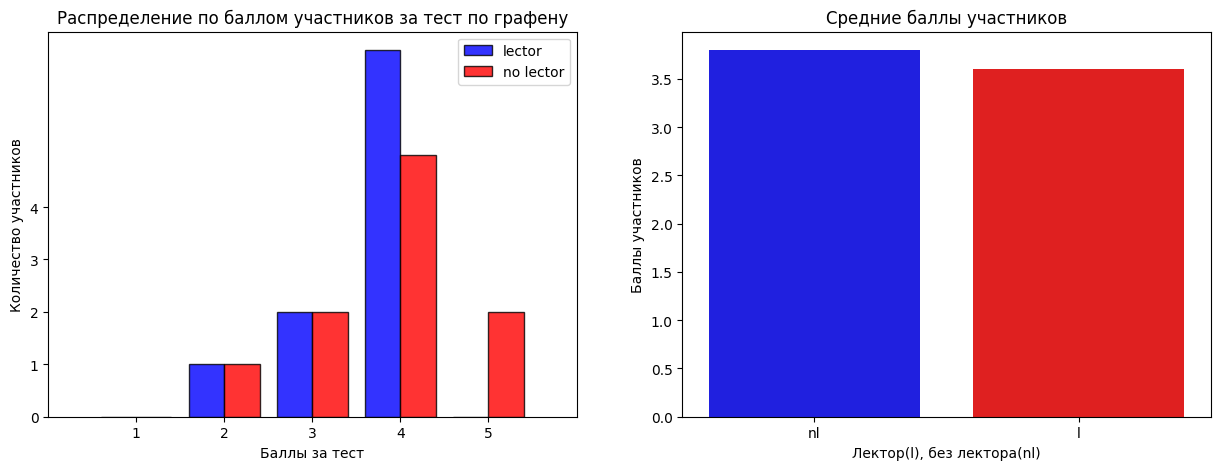

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].points, df[df.lector_flag=='nl'].points], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по баллом участников за тест по графену')
plt.ylabel('Количество участников')
plt.xlabel('Баллы за тест')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.points, errorbar=None, palette = ['b', 'r'])
plt.title("Средние баллы участников")
plt.ylabel("Баллы участников")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

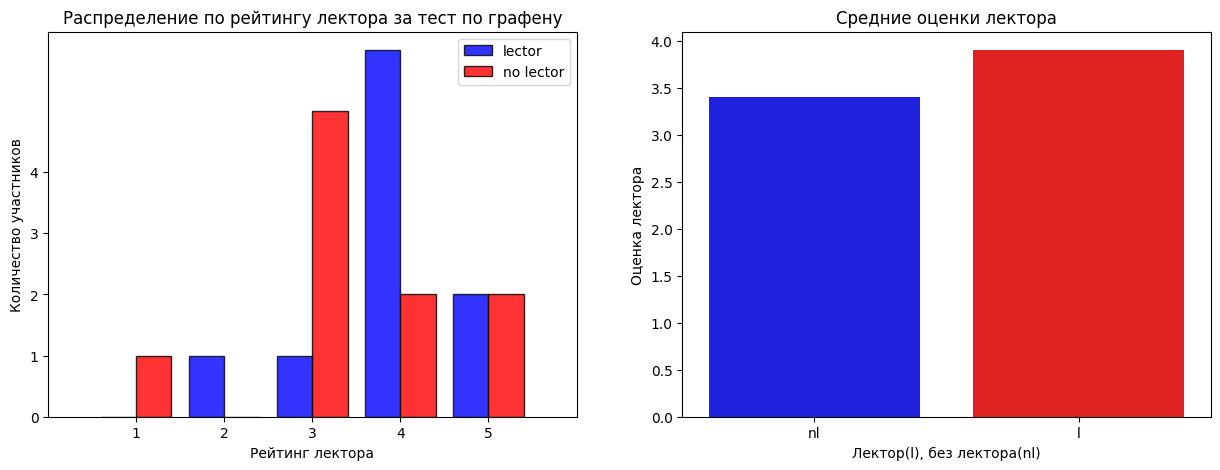

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Lector_rate, df[df.lector_flag=='nl'].Lector_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лектора за тест по графену')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лектора')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Lector_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лектора")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

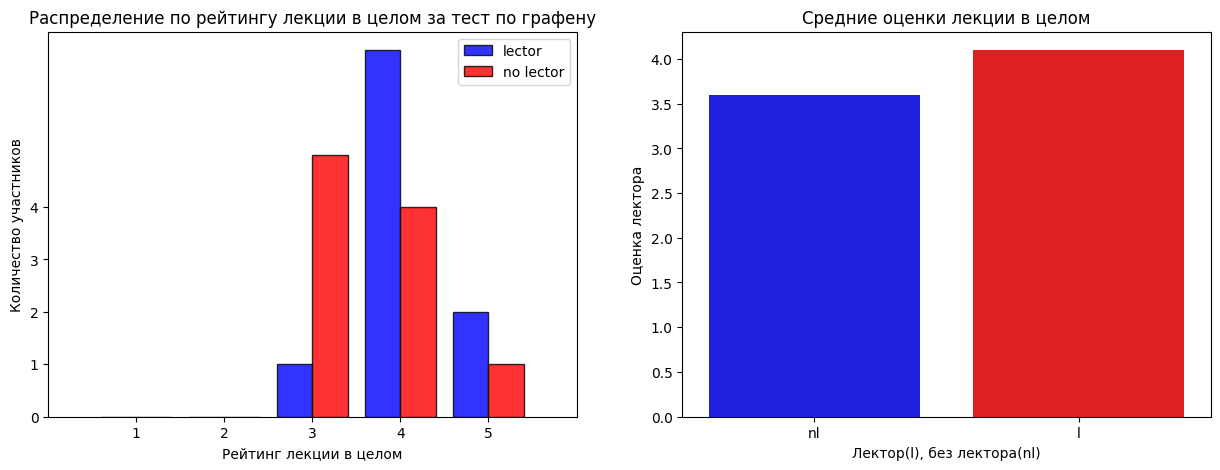

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].General_rate, df[df.lector_flag=='nl'].General_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу лекции в целом за тест по графену')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг лекции в целом')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.General_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки лекции в целом")
plt.ylabel("Оценка лектора")
plt.xlabel("Лектор(l), без лектора(nl)")

Text(0.5, 0, 'Лектор(l), без лектора(nl)')

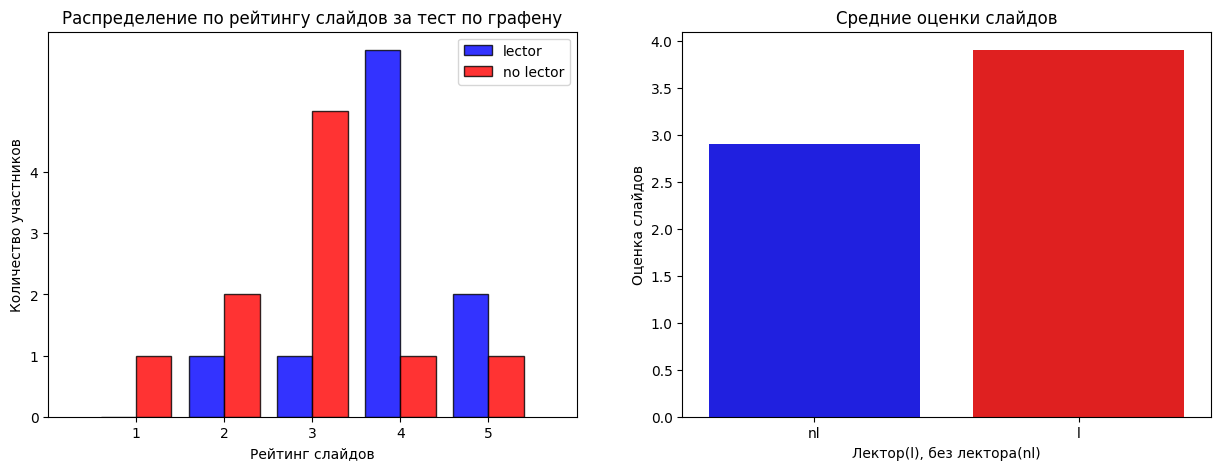

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist([df[df.lector_flag=='l'].Slide_rate, df[df.lector_flag=='nl'].Slide_rate], 
        edgecolor='black', color=['b', 'r'], 
        label=['lector', 'no lector'],alpha=0.8, bins=range(1, 7), align='left')
plt.xticks(range(1, 6))
plt.yticks(range(0, 5))
plt.xlim([0, 6])
plt.legend(loc='upper right')
plt.title('Распределение по рейтингу слайдов за тест по графену')
plt.ylabel('Количество участников')
plt.xlabel('Рейтинг слайдов')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='lector_flag', y=df.Slide_rate, errorbar=None, palette = ['b', 'r'])
plt.title("Средние оценки слайдов")
plt.ylabel("Оценка слайдов")
plt.xlabel("Лектор(l), без лектора(nl)")

In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [67]:
df.corr()

,points,Lector_rate,Slide_rate,General_rate
points,1.00000,-0.06947,0.14390,-0.08812
Lector_rate,-0.06947,1.00000,0.68374,0.59976
Slide_rate,0.14390,0.68374,1.00000,0.65893
General_rate,-0.08812,0.59976,0.65893,1.00000


In [68]:
df[df.lector_flag=='nl'].corr()

,points,Lector_rate,Slide_rate,General_rate
points,1.00000,-0.22662,0.08790,-0.13834
Lector_rate,-0.22662,1.00000,0.72253,0.75814
Slide_rate,0.08790,0.72253,1.00000,0.80863
General_rate,-0.13834,0.75814,0.80863,1.00000


In [72]:
cor_l = df_lect[df_lect.lector_flag=='l'].corr()

In [71]:
from google.colab import files
cor_l.to_csv('example_file.csv')
files.download('example_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>